DS 2001 python

In [360]:
import matplotlib.pyplot as plt
import pandas as pd


df = pd.read_csv(r'/Users/amelianorman/Desktop/ds2001-project/clinical_breast_cleaned.csv')
print(df.head())

   Gender  Age.at.Initial.Pathologic.Diagnosis ER.Status  PR.Status  \
0  FEMALE                                   66  Negative          0   
1  FEMALE                                   40  Negative          0   
2  FEMALE                                   48  Negative          0   
3  FEMALE                                   56  Negative          0   
4  FEMALE                                   38  Negative          0   

  HER2.Final.Status Tumor Node.Coded Metastasis Metastasis.Coded  AJCC.Stage  \
0          Negative    T3   Positive         M1         Positive    Stage IV   
1          Negative    T2   Negative         M0         Negative   Stage IIA   
2          Negative    T2   Positive         M0         Negative   Stage IIB   
3          Negative    T2   Positive         M0         Negative   Stage IIB   
4          Negative    T3   Positive         M0         Negative  Stage IIIC   

  Converted.Stage Survival.Data.Form Vital.Status  \
0   No_Conversion           followup   

In [361]:
# rename columns and remove rows with male participants 

cleaned = df[["Gender", "Age.at.Initial.Pathologic.Diagnosis", "AJCC.Stage"]]
cleaned = cleaned.rename(columns={"Age.at.Initial.Pathologic.Diagnosis": "initial_age", "AJCC.Stage": "AJCC_stage"})

cleaned = cleaned.drop(cleaned[cleaned.Gender == "MALE"].index)
        
print(cleaned.head())

   Gender  initial_age  AJCC_stage
0  FEMALE           66    Stage IV
1  FEMALE           40   Stage IIA
2  FEMALE           48   Stage IIB
3  FEMALE           56   Stage IIB
4  FEMALE           38  Stage IIIC


In [362]:
# fixing indexing on graph; y-axis is showing values in the incorrect order

order = ["Stage I", "Stage IA", "Stage IB", "Stage II", "Stage IIA", "Stage IIB", "Stage III", "Stage IIIA", "Stage IIIB", "Stage IIIC", "Stage IV"]
order2 = ["I", "IA", "IB", "II", "IIA", "IIB", "III", "IIIA", "IIIB", "IIIC", "IV"]

cleaned['AJCC_stage'] = [order.index(x) for x in cleaned['AJCC_stage']]

df_sorted = cleaned.sort_values(["AJCC_stage", "initial_age", "Gender"], ascending=True)

df_sorted['AJCC_stage'] = [order2[x] for x in df_sorted['AJCC_stage']]


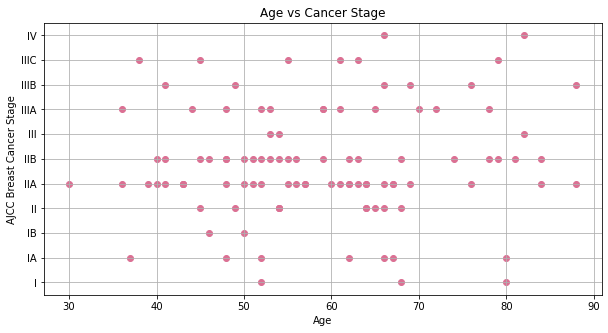

In [363]:
plt.figure(figsize = (10,5))

plt.scatter(df_sorted['initial_age'], df_sorted['AJCC_stage'], c='palevioletred')
plt.title('Age vs Cancer Stage')
plt.xlabel('Age') 
plt.ylabel('AJCC Breast Cancer Stage') 
plt.grid()

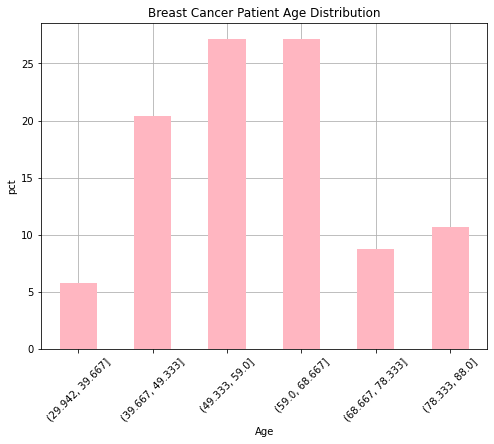

In [364]:
import numpy as np

#print(df_sorted['initial_age'].min()) # it's 30
#print(df_sorted['initial_age'].max()) # it's 88

#age_groups = ["30-39", "40-49", "50-59", "60-69", "70-79", "80-89"]

out = pd.cut(df_sorted['initial_age'], bins=6)
out_norm = out.value_counts(sort=False, normalize=True).mul(100)
ax = out_norm.plot.bar(rot=45, color="lightpink", figsize=(8,6), zorder=3)
ax.grid(zorder=0)
# ax.set_xticklabels([c[1:-1].replace(","," to") for c in out.cat.categories])
plt.title('Breast Cancer Patient Age Distribution')
plt.xlabel('Age') 
plt.ylabel('pct')
plt.show()

In [365]:
# normalize data because of insane age distribution
# currently doesn't do anything but count how many values fall between a specific age distribution

count1 = 0
count2 = 0
count3 = 0
count4 = 0
count5 = 0
count6 = 0

for age in df_sorted['initial_age']:
    if 30 <= age < 40:
        count1 += 1
    
    elif 40 <= age < 50:
        count2 += 1
    
    elif 50 <= age < 60:
        count3 += 1
    
    elif 60 <= age < 70:
        count4 += 1
    
    elif 70 <= age < 80:
        count5 += 1
    
    elif 80 <= age < 90:
        count6 += 1

print(count1, count2, count3, count4, count5, count6) 


6 21 28 30 9 9


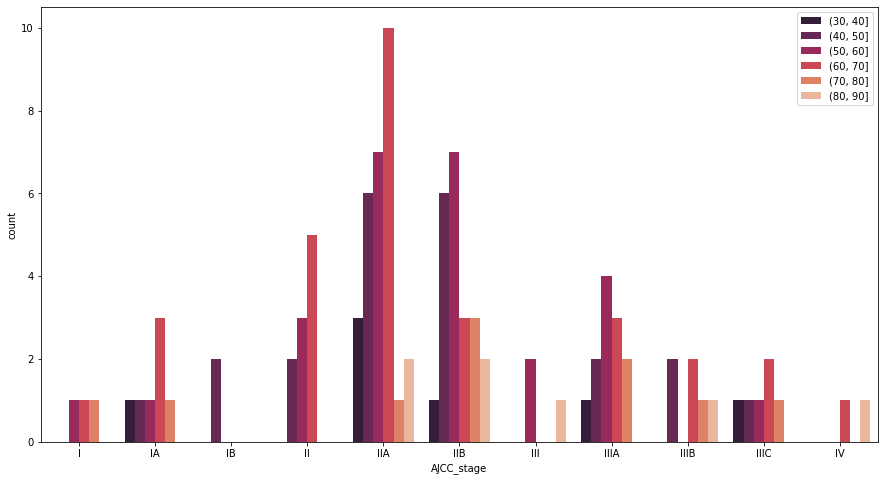

In [369]:
import seaborn as sns
new_bins = pd.cut(df_sorted['initial_age'], bins=[30, 40, 50, 60, 70, 80, 90])

plt.figure(figsize = (15,8))
hist = sns.countplot(x="AJCC_stage", hue=new_bins, data=df_sorted, palette="rocket")
plt.legend(loc='upper right')
